**Implementasi CNN pada MNIST Database ( large database of handwritten digits )**

In [0]:
#mnist dataset import

import keras
from keras.datasets import mnist
#load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<Figure size 576x396 with 0 Axes>

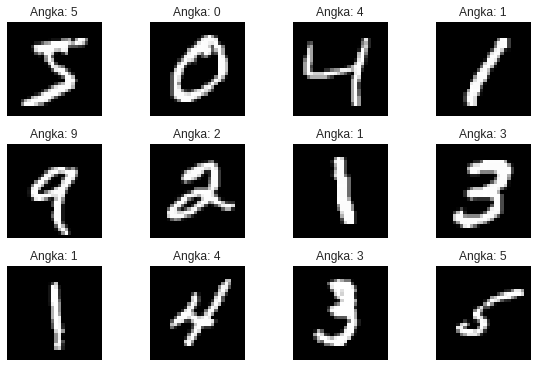

<Figure size 576x396 with 0 Axes>

In [57]:
#showing example of dataset
import matplotlib.pyplot as plt
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Angka: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.figure()

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import History


#normalize input data for keras processing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#typecast into decimal
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

In [59]:
x_train.shape


(60000, 28, 28, 1)

In [0]:
#model building
model = Sequential()

#convolutional layer using Rectified Linear 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))

#choose the best feature using pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#flatten dimensions
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))

#output a softmax
model.add(Dense(10,activation=tf.nn.softmax))

In [61]:
epoch=10
history = History()
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
train_log = model.fit(x=x_train,y=y_train, epochs=epoch,callbacks=[history])

Epoch 1/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.2047 - acc: 0.9386
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0798 - acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0583 - acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0435 - acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0358 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0304 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0255 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0209 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0201 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 11s 190us/step - loss: 

In [62]:
train_log.history

{'acc': [0.9386166666666667,
  0.9755833333333334,
  0.9818166666666667,
  0.9856833333333334,
  0.9886166666666667,
  0.9895666666666667,
  0.9913833333333333,
  0.9928666666666667,
  0.9933666666666666,
  0.9941833333333333],
 'loss': [0.20471670162429412,
  0.07983145790842051,
  0.05830440425012882,
  0.0434923149814674,
  0.03580991765104312,
  0.03037518907599345,
  0.025528630986896558,
  0.020865751777892003,
  0.020060791753564868,
  0.017097907631772494]}

In [63]:
#menghitung akurasi dan loss data validation
valid_log = model.evaluate(x_test, y_test)
valid_log

10000/10000 [==============================] - 1s 84us/step


[0.06574423290497944, 0.9852]

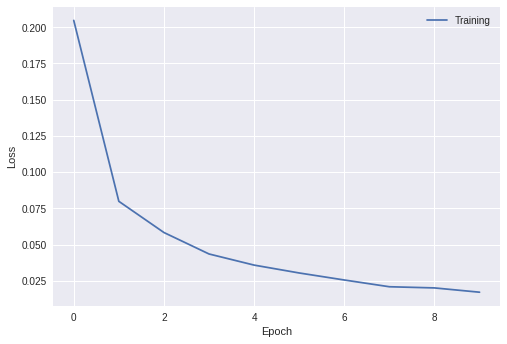

In [64]:
# plotting the metrics
plt.plot(train_log.history['loss'],label='Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


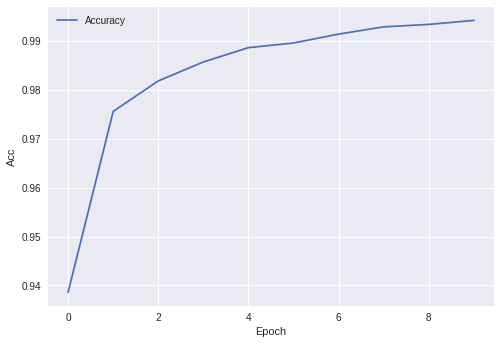

In [65]:
# plotting the metrics
plt.plot(train_log.history['acc'],label='Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()
